2. LDA analysis

2.1. Data Cleaning

In [1]:
import pandas as pd
import re

In [2]:
# Remove emoji and other emoticons
def filter_emoji(desstr, restr=''):
    try:
        co = re.compile(u'[\U00010000-\U0010ffff]')
    except re.error:
        co = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    return co.sub(restr, desstr)
    
# Define the cleaning function
def clean_text(text):
    # If the input value is NaN or any other non-string type, the empty string is returned.
    if not isinstance(text, str):
        return ''
    # Remove HTML tags
    text = re.sub('<[^>]+>', '', text)
    # Remove [ ], [ ] ##and its contents
    text = re.sub(r'【.*?】', '', text)
    text = re.sub(r'\[.*?\]', '', text)    
    text = re.sub(r'#.*?#', '', text)
    # Remove @ and anything after it
    text = re.sub(r'@.*', ' ', text)
    # Remove emoji and other emoticons
    text = filter_emoji(text)
    # Remove all question marks (Chinese and English) and replace with spaces
    text = re.sub(r'[？?]', ' ', text)
    text = re.sub(r'[.-]', ' ', text)
    # Removes line breaks, carriage returns, and tabs and replaces them with spaces
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    # Compress consecutive blank characters into a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [3]:
file_path = r'xhs_content.csv'

# Ignore error characters
with open(file_path, mode='r', encoding='GB2312', errors='ignore') as f:
    df = pd.read_csv(f)

# Replacement of Error Characters
with open(file_path, mode='r', encoding='GB2312', errors='replace') as f:
    df = pd.read_csv(f)

# Check the data
df.head()

,title,content,time,author_name,liked_count,collected_count,comment_count,tag_list,note_url,source_keyword
0,我们结婚啦?????♀??????♂???,遇见你是我一生最幸运的事情。\n\t\n大学初识，你总等我上完最后一节晚课一起在操场上走着一...,1.730000e+12,Chelsea鹅,12.4万,7736,9574,NaN,https://www.xiaohongshu.com/explore/66ff3fc300...,婚姻
1,有婚后过的特别幸福的姐妹来讲一下感受吗,未婚 太丧了 身边的朋友结婚以后过的也都不咋好 根本对婚姻没啥期待,1.660000e+12,糖醋鱼,9.9万,5.4万,1.7万,NaN,https://www.xiaohongshu.com/explore/62f3bd8d00...,婚姻
2,不结婚，你的罪名就只有不结婚,#不婚[话题]# #结婚的意义[话题]# #爱情婚姻观[话题]# #人生感悟[话题]# #一...,1.720000e+12,罗女士日常,8.3万,2.8万,6661,"不婚,结婚的意义,爱情婚姻观,人生感悟,一起来讨论,人生,不婚主义,停止内耗,拒绝内耗,人间...",https://www.xiaohongshu.com/explore/664ec95c00...,婚姻
3,哭死了，这就是结婚7年后的深夜。。。,我和平常一样在熬夜刷小红书，老公本来在我旁边睡的安稳，没想到忽然通红着双眼支起半个身子伸手挡...,1.670000e+12,小喵九条命,6.9万,6596,6475,"婚后生活,老公,婚姻,七年之痒,恋爱长跑,结婚,爱情",https://www.xiaohongshu.com/explore/63751e3c00...,婚姻
4,很多人怕结婚，到底是怕什么？这篇绝了,??出处：《成年人的世界没有容易二字》\n??作者：老杨的猫头鹰\n??\n????????...,1.660000e+12,人间值得,6.4万,3.4万,1669,"书摘,婚姻,爱情,情感,女人",https://www.xiaohongshu.com/explore/62ddf1c900...,婚姻


In [4]:
# delete useless columns
columns_to_drop = ['author_name']
columns_to_drop = [column for column in columns_to_drop if column in df.columns]
df = df.drop(columns=columns_to_drop)

In [5]:
# Convert time column
df['time'] = df['time'].astype(str)

# Checks for possible Unix timestamps, otherwise parses by date
df['time'] = df['time'].apply(lambda x: pd.to_datetime(float(x), unit='ms') if x.replace('.', '', 1).isdigit() else pd.NaT)

# Processing of standard date formats
df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d', errors='coerce')

# If parsing fails, return blank characters
df['time'] = df['time'].fillna('')

# Delete duplicate comments
df = df.drop_duplicates(subset=['content'])

In [6]:
# Clean the 'content' column and save the result to a new column 'cleaned_review'
# Fill the NaN with '' and make sure the column is of string type
df['content'] = df['content'].fillna('').astype(str)

# Apply cleaning functions
df['cleaned_review'] = df['content'].apply(clean_text)
# Delete content column
df = df.drop(['content'], axis=1)
df.head(5)

,title,time,liked_count,collected_count,comment_count,tag_list,note_url,source_keyword,cleaned_review
0,我们结婚啦?????♀??????♂???,2024-10-27 03:33:20,12.4万,7736,9574,NaN,https://www.xiaohongshu.com/explore/66ff3fc300...,婚姻,遇见你是我一生最幸运的事情。 大学初识，你总等我上完最后一节晚课一起在操场上走着一圈又一圈地...
1,有婚后过的特别幸福的姐妹来讲一下感受吗,2022-08-08 23:06:40,9.9万,5.4万,1.7万,NaN,https://www.xiaohongshu.com/explore/62f3bd8d00...,婚姻,未婚 太丧了 身边的朋友结婚以后过的也都不咋好 根本对婚姻没啥期待
2,不结婚，你的罪名就只有不结婚,2024-07-03 09:46:40,8.3万,2.8万,6661,"不婚,结婚的意义,爱情婚姻观,人生感悟,一起来讨论,人生,不婚主义,停止内耗,拒绝内耗,人间...",https://www.xiaohongshu.com/explore/664ec95c00...,婚姻,
3,哭死了，这就是结婚7年后的深夜。。。,2022-12-02 16:53:20,6.9万,6596,6475,"婚后生活,老公,婚姻,七年之痒,恋爱长跑,结婚,爱情",https://www.xiaohongshu.com/explore/63751e3c00...,婚姻,我和平常一样在熬夜刷小红书，老公本来在我旁边睡的安稳，没想到忽然通红着双眼支起半个身子伸手挡...
4,很多人怕结婚，到底是怕什么？这篇绝了,2022-08-08 23:06:40,6.4万,3.4万,1669,"书摘,婚姻,爱情,情感,女人",https://www.xiaohongshu.com/explore/62ddf1c900...,婚姻,出处：《成年人的世界没有容易二字》 作者：老杨的猫头鹰 很多人都怕结婚， 到底是在怕什么呢 ...


In [7]:
# Save cleaned data
output_path = r'xhs_content_cleaned.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"The cleaned data has been saved to: {output_path}")

The cleaned data has been saved to: xhs_content_cleaned.csv


2.2. Text segmentation

In [8]:
#!pip install jieba
import jieba.posseg as pseg
import pandas as pd

In [9]:
# Read CSV file
def read_csv(file_path):  
    try:
        # Try reading the file using utf-8 encoding
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If utf-8 encoding fails, try using gb18030 encoding
        data = pd.read_csv(file_path, encoding='gb18030')
    return data

In [10]:
# Write to CSV file
def write_csv(data, file_path):  
    data.to_csv(file_path, index=False, encoding='utf-8-sig')

In [11]:
# Load stopwords and reserved words
def load_words(file_path):  
    with open(file_path, 'r', encoding='utf-8') as f:  
        words = [line.strip() for line in f]
    return set(words)

In [12]:
# load stopwords
def load_stopwords(*file_paths):  
    stopwords = set()
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:  
            stopwords.update([line.strip() for line in f])
    return stopwords

In [13]:
# Tokenization and part-of-speech tagging, with stop words filtered out
def segment_and_tag(sentence, stopwords):  
    words = pseg.cut(sentence)
    result = []
    desired_pos = {'n', 'nr', 'ns', 'nt', 'nz', 'a', 'v'}  
    for word, flag in words:  
       # Only keep words not in the stopword list and those that are nouns, adjectives, or verbs
        if word not in stopwords and flag in desired_pos:  
            result.append(word)  
    return ' '.join(result)

In [14]:
# Main function
def process_csv_file(input_file, stopwords_files, output_file):  
    # Load stopwords (merge stopwords from multiple files)
    stopwords = load_stopwords(*stopwords_files)
  
    # Read the CSV file
    data = read_csv(input_file)
    
     # Tokenize and perform part-of-speech tagging on the specified column, and save to a new column
    data['Tokenization Result'] = data['cleaned_review'].apply(
        lambda x: segment_and_tag(str(x) if not pd.isnull(x) else '', stopwords)
    )
    
    # Write to CSV file
    write_csv(data, output_file)
    print(f"Processed {input_file} and saved to {output_file}")

In [15]:
# File path configuration
input_file = r'xhs_content_cleaned.csv'  # Input file path
stopwords_files = [
    r'baidu_stopwords.txt',  # Stopword file 1
    r'hit_stopwords.txt'   # Stopword file 2
]
output_file = r'xhs_content_segmented.csv'  # Output file path

# Process a single CSV file
process_csv_file(input_file, stopwords_files, output_file)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\qry\AppData\Local\Temp\jieba.cache
Loading model cost 0.917 seconds.
Prefix dict has been built successfully.


Processed xhs_content_cleaned.csv and saved to xhs_content_segmented.csv


word cloud 

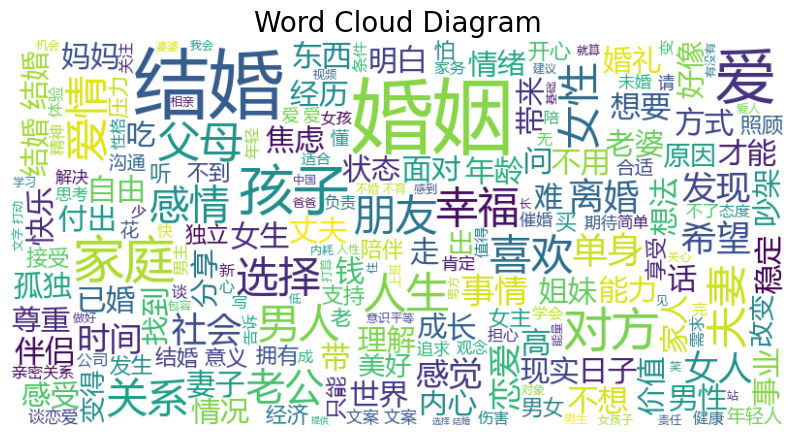

In [16]:
# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the file
file_path = "xhs_content_segmented.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Extract the "Tokenization Result" column
text_data = df["Tokenization Result"].dropna().tolist()

# Combine all tokenized results into a single string
# The tokenized results are separated by spaces, simply join them with a space
text = " ".join(text_data)

# Set word cloud parameters
wordcloud = WordCloud(
    font_path="msyh.ttc",  # Specify the font path to ensure Chinese support (e.g., Microsoft YaHei font)
    width=800,            # Image width
    height=400,           # Image height
    background_color="white",  # Background color
    max_words=200,        # Maximum number of words to display
    colormap="viridis"    # Colormap to use
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Do not show axes
plt.title("Word Cloud Diagram", fontsize=20)  # Add title
plt.savefig('wordcloud.png', format='png', dpi=300)  # Save as PNG with a resolution of 300 dpi
plt.show()

2.3. LDA analysis

2.3.1 Train the model and determine the optimal number of topics

In [17]:
#! pip install gensim

import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings

warnings.filterwarnings('ignore')  

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [18]:
# Data path
PATH = r"xhs_content_segmented.csv"

# Read and process data
file_object2 = open(PATH, encoding='utf_8_sig', errors='ignore').read().split('\n') # Read data line by line
data_set = [] # Create a list to store tokenized data

for i in range(len(file_object2)):
    result = []
    seg_list = file_object2[i].split()
    for w in seg_list: # Tokenize each line
        result.append(w)
    data_set.append(result)

# Print processing results
print("Tokenized data example:", data_set[:2])  # Print only the first two lines as an example

Tokenized data example: [['title,time,liked_count,collected_count,comment_count,tag_list,note_url,source_keyword,cleaned_review,Tokenization', 'Result'], ['我们结婚啦?????♀??????♂???,2024-10-27', '03:33:20,12.4万,7736,9574,,https://www.xiaohongshu.com/explore/66ff3fc3000000002a033ea1?xsec_token=ABGrxO_H72NK_XZej7IvTECzpKNwjlWUAl-T1khtOQKUo=&xsec_source=pc_search,婚姻,遇见你是我一生最幸运的事情。', '大学初识，你总等我上完最后一节晚课一起在操场上走着一圈又一圈地聊天，到现在每晚带着巴斯loobi一起在小区里同样一圈又一圈地聊生活工作，好像话题永远都聊不完。', '你六年如一日地对我和我的家人好，好到我妈妈都让我平时不要欺负你，也不要让你太累。你也总说笑自己是阿姨叔叔shashou，但我知道你其实是因为爱我', '才会同时对我的家人百依百顺。', '从小到大我都是一个很拧巴的人。讨好型人格，不会拒绝，不爱和人深度交流，但其实我一直把自己的情绪和感受锁在内心世界里。', '六年来你一直以来都像一个小太阳一样陪在我身边，温暖我、治愈我，慢慢帮我打开童年到现在的心结。', '我总开玩笑说你长得像30好几，心理也像30好几，但其实我很庆幸在这个年纪就遇见了你，让我少走了很多弯路，你也帮我扛下了很多我本需要自己承担的重任，让我在成长的路上很轻松。', '跟你在一起后，不论是家人还是朋友都意识到我的快速成长和懂事。', '大二的时候，你让我去开一张空卡，然后把我们两个人挣的钱都都存放进这张卡里，把这张卡就作为我的婚前财产。', '你说因为只有我们自己靠双手挣的钱才是自己的底气，于是我们一步步积累下了自己的小金库，也拥有凭自己的喜好做任何决定的权利。', '我们同时一起进步，一起成长。这让我们现在的爱情更健康，也更幸福。', '我说我想要只属于两个人的求婚，你选择了一个看似平淡的夜晚，在我觉得最自在舒服的家里为我单膝下跪', '，我

In [19]:
# Construct the document-term matrix
dictionary = corpora.Dictionary(data_set)
corpus = [dictionary.doc2bow(text) for text in data_set]

print(f"Number of words in the dictionary: {len(dictionary)}")
print(f"BOW representation of the first document in the corpus: {corpus[0]}")

Number of words in the dictionary: 26904
BOW representation of the first document in the corpus: [(0, 1), (1, 1)]


In [20]:
# Calculate perplexity
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(f"Perplexity: {ldamodel.log_perplexity(corpus)}")
    return ldamodel.log_perplexity(corpus)

# Calculate coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(f"Coherence: {ldacm.get_coherence()}")
    return ldacm.get_coherence()

In [21]:
# Plot the coherence line chart
x = range(2, 16)
y = [coherence(i) for i in x]

[(0, '0.019*"婚姻" + 0.010*"结婚" + 0.007*"女性" + 0.006*"爱" + 0.005*"家庭" + 0.005*"对方" + 0.005*"孩子" + 0.005*"爱情" + 0.004*"幸福" + 0.004*"情感"'), (1, '0.015*"结婚" + 0.006*"婚姻" + 0.006*"爱" + 0.005*"孩子" + 0.005*"家庭" + 0.005*"父母" + 0.003*"朋友" + 0.003*"喜欢" + 0.003*"对方" + 0.003*"选择"')]
Coherence: 0.3907121177865722
[(0, '0.024*"婚姻" + 0.010*"结婚" + 0.006*"女性" + 0.005*"爱" + 0.005*"对方" + 0.005*"爱情" + 0.005*"幸福" + 0.004*"选择" + 0.004*"孩子" + 0.004*"家庭"'), (1, '0.014*"结婚" + 0.007*"婚姻" + 0.006*"父母" + 0.005*"孩子" + 0.004*"爱" + 0.004*"家庭" + 0.004*"朋友" + 0.004*"对方" + 0.003*"喜欢" + 0.003*"人生"'), (2, '0.013*"结婚" + 0.008*"婚姻" + 0.008*"爱" + 0.006*"家庭" + 0.006*"孩子" + 0.005*"情感" + 0.004*"女性" + 0.004*"男人" + 0.003*"文案" + 0.003*"对方"')]
Coherence: 0.3858108560053061
[(0, '0.027*"婚姻" + 0.011*"结婚" + 0.007*"女性" + 0.006*"爱" + 0.005*"爱情" + 0.005*"对方" + 0.005*"选择" + 0.004*"幸福" + 0.004*"孩子" + 0.004*"人生"'), (1, '0.016*"结婚" + 0.007*"婚姻" + 0.006*"父母" + 0.004*"爱" + 0.004*"孩子" + 0.004*"朋友" + 0.004*"家庭" + 0.004*"选择" + 0.003*"人生" + 0.003*

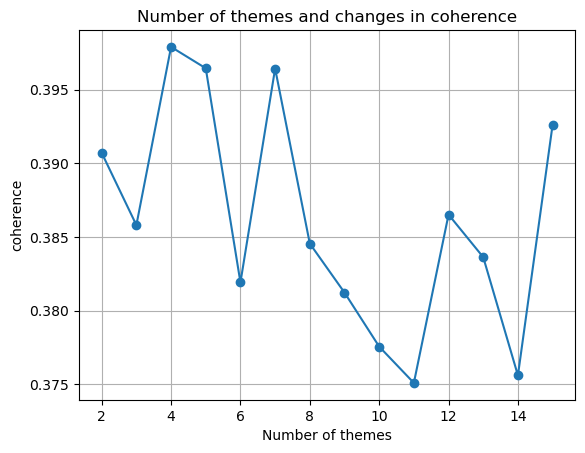

In [22]:
plt.plot(x, y, marker='o')
plt.xlabel('Number of themes')
plt.ylabel('coherence')
matplotlib.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue
plt.title('Number of themes and changes in coherence')
plt.grid(True)
plt.savefig('coherence_vs_themes.png', dpi=300)  # Save the plot with specified file name and resolution
plt.show()

2.3.2 Predict word topics and visualize the clustering results

In [23]:
#!pip install gensim pyldavis
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pandas as pd
import csv
import pyLDAvis.gensim_models

In [24]:
# Data preparation
PATH = "xhs_content_segmented.csv"

# Read data
file_object2 = open(PATH, encoding='utf-8', errors='ignore').read().split('\n')  # Read data line by line
data_set = []  # List to store tokenized data

# Tokenize each line of data and store
for i in range(len(file_object2)):
    result = []
    seg_list = file_object2[i].split() # Split each line
    for w in seg_list:
        result.append(w)  # Store each token
    data_set.append(result)

# Show the first 5 rows for inspection
data_set[:5]


[['\ufefftitle,time,liked_count,collected_count,comment_count,tag_list,note_url,source_keyword,cleaned_review,Tokenization',
  'Result'],
 ['我们结婚啦?????♀??????♂???,2024-10-27',
  '03:33:20,12.4万,7736,9574,,https://www.xiaohongshu.com/explore/66ff3fc3000000002a033ea1?xsec_token=ABGrxO_H72NK_XZej7IvTECzpKNwjlWUAl-T1khtOQKUo=&xsec_source=pc_search,婚姻,遇见你是我一生最幸运的事情。',
  '大学初识，你总等我上完最后一节晚课一起在操场上走着一圈又一圈地聊天，到现在每晚带着巴斯loobi一起在小区里同样一圈又一圈地聊生活工作，好像话题永远都聊不完。',
  '你六年如一日地对我和我的家人好，好到我妈妈都让我平时不要欺负你，也不要让你太累。你也总说笑自己是阿姨叔叔shashou，但我知道你其实是因为爱我',
  '才会同时对我的家人百依百顺。',
  '从小到大我都是一个很拧巴的人。讨好型人格，不会拒绝，不爱和人深度交流，但其实我一直把自己的情绪和感受锁在内心世界里。',
  '六年来你一直以来都像一个小太阳一样陪在我身边，温暖我、治愈我，慢慢帮我打开童年到现在的心结。',
  '我总开玩笑说你长得像30好几，心理也像30好几，但其实我很庆幸在这个年纪就遇见了你，让我少走了很多弯路，你也帮我扛下了很多我本需要自己承担的重任，让我在成长的路上很轻松。',
  '跟你在一起后，不论是家人还是朋友都意识到我的快速成长和懂事。',
  '大二的时候，你让我去开一张空卡，然后把我们两个人挣的钱都都存放进这张卡里，把这张卡就作为我的婚前财产。',
  '你说因为只有我们自己靠双手挣的钱才是自己的底气，于是我们一步步积累下了自己的小金库，也拥有凭自己的喜好做任何决定的权利。',
  '我们同时一起进步，一起成长。这让我们现在的爱情更健康，也更幸福。',
  '我说我想要只属于两个人的求婚，你选择了一个看似平淡的夜晚，在我觉得最自在舒服的家里为我单

In [25]:
# Create dictionary
dictionary = Dictionary(data_set)

# Convert each document into "bag-of-words" format
corpus = [dictionary.doc2bow(text) for text in data_set]

# Display the bag-of-words representation of the first few documents
corpus[:5]

[[(0, 1), (1, 1)],
 [(2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 4),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 3),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1),

In [32]:
# Train the LDA model with 7 topics
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, passes=30, random_state=1)

# Output the keywords for each topic
lda.print_topics(num_topics=7, num_words=10)

[(0,
  '0.037*"婚姻" + 0.012*"结婚" + 0.007*"爱情" + 0.006*"幸福" + 0.006*"爱" + 0.006*"对方" + 0.006*"女性" + 0.005*"选择" + 0.004*"关系" + 0.004*"家庭"'),
 (1,
  '0.014*"结婚" + 0.009*"婚姻" + 0.006*"父母" + 0.005*"选择" + 0.004*"孩子" + 0.004*"人生" + 0.004*"喜欢" + 0.004*"爱" + 0.004*"家庭" + 0.003*"朋友"'),
 (2,
  '0.016*"结婚" + 0.009*"婚姻" + 0.009*"爱" + 0.007*"家庭" + 0.005*"孩子" + 0.004*"选择" + 0.004*"爱情" + 0.004*"喜欢" + 0.004*"男人" + 0.004*"幸福"'),
 (3,
  '0.011*"情感" + 0.010*"婚姻" + 0.008*"家庭" + 0.008*"文案" + 0.007*"结婚" + 0.006*"孩子" + 0.005*"爱" + 0.005*"对方" + 0.005*"夫妻" + 0.004*"文字"'),
 (4,
  '0.011*"孩子" + 0.009*"结婚" + 0.005*"对方" + 0.005*"爱" + 0.004*"父母" + 0.004*"家庭" + 0.003*"人生" + 0.002*"已婚" + 0.002*"带" + 0.002*"关系"'),
 (5,
  '0.015*"结婚" + 0.008*"爱" + 0.007*"女性" + 0.005*"对方" + 0.005*"婚姻" + 0.005*"男人" + 0.004*"社会" + 0.004*"孩子" + 0.004*"选择" + 0.004*"家庭"'),
 (6,
  '0.011*"结婚" + 0.003*"婚姻" + 0.003*"朋友" + 0.003*"幸福" + 0.003*"意义" + 0.003*"单身" + 0.003*"感觉" + 0.002*"孤独" + 0.002*"关系" + 0.002*"夫妻"')]

In [33]:
# Get the topic distribution for each document
document_topics = lda.get_document_topics(corpus)

# View the topic distribution of the first document
document_topics[0]

[(0, 0.7131602),
 (1, 0.047806606),
 (2, 0.04780648),
 (3, 0.04780656),
 (4, 0.04780676),
 (5, 0.04780655),
 (6, 0.0478068)]

In [34]:
# Prepare a dictionary to store each word and its most probable topic
word_topics = {}

# Iterate through each document and its topic distribution
for doc_index, topic_distribution in enumerate(document_topics):
    for topic_id, probability in topic_distribution:
        # Iterate through each word in the current document
        for word_id, _ in dictionary.doc2bow(data_set[doc_index]):
            word = dictionary[word_id]
            # Check if the word already has a topic assigned, and if not or if a new topic has higher probability, update it
            if word not in word_topics or probability > word_topics.get(word, (0, None))[0]:
                word_topics[word] = (probability, topic_id)

# Create a new CSV file to save each word and its most probable topic ID
output_word_topics_path = "word_topics.csv"
with open(output_word_topics_path, 'w', encoding='utf-8-sig', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Word", "Most Probable Topic ID", "Probability"])
    for word, (probability, topic_id) in word_topics.items():
        writer.writerow([word, topic_id, probability])

print(f"Words and their most probable topics have been saved to the file：{output_word_topics_path}")


Words and their most probable topics have been saved to the file：word_topics.csv


In [35]:
# Prepare and visualize the LDA results
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

# Display the LDA visualization
lda_display


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.097467  0.034218       1        1  21.961564
2      0.048927  0.019398       2        1  21.417043
5      0.035405  0.038368       3        1  15.449513
3      0.005170 -0.135191       4        1  14.747878
1     -0.008908  0.007523       5        1  12.380163
4     -0.057906 -0.009464       6        1   7.462052
6     -0.120155  0.045148       7        1   6.581788, topic_info=     Term         Freq        Total Category  logprob  loglift
151    婚姻  1205.000000  1205.000000  Default  30.0000  30.0000
6884   文案   105.000000   105.000000  Default  29.0000  29.0000
67     情感   199.000000   199.000000  Default  28.0000  28.0000
204    孩子   422.000000   422.000000  Default  27.0000  27.0000
2219   文字    64.000000    64.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
448    男人     7.951501   221.8

In [36]:
# Save the visualization results to an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

print(f"LDA Visualization results saved")


LDA Visualization results saved


In [37]:
# This part of the code saves the frequency distribution table for topic words
df_1 = lda_display[0][:]  # Topic frequency data
df_2 = lda_display[1][:]  # Words corresponding to each topic
df_3 = lda_display[2][:]  # Relationship between topics and words

# Save these data as CSV files
df_1.to_csv('Topic_Freq_1.csv', index=False, encoding='utf-8-sig')
df_2.to_csv('Topic_Freq_Total_Term_2.csv', index=False, encoding='utf-8-sig')
df_3.to_csv('Topic_Freq_Term_3.csv', index=False, encoding='utf-8-sig')

print("Topic word frequency data has been saved")


Topic word frequency data has been saved
